# Parker Dunn
## Copyright 2021 parker_dunn@outlook.com

## Main Script for Working on "US Medical Insurance" project

In [36]:
import csv
from math import ceil
from statistics import mean

from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

# from sklearn.preprocessing import StandardScalar
from sklearn import preprocessing as pp # not something I would typically do, but I had a problem with
                                        # the import above

# Alternative
# import statsmodels.api as sm

### (I.) Getting started with the dataset

NOTES ON THE DATASET
* Features:
    * age - integer
    * sex - string
    * bmi - float
    * children - int
    * region - string
    * charges - float
* Looks like there are about 1339 entries in the CSV --> so 1338 observations and the header roow at the top
* DECISION: technically, I should be able to complete this assignment without NumPy & Pandas, so I will try to do so since this topic doesn't interest me that much and I don't intend to do too much with this dataset.

In [8]:
# READING IN THE DATA
insurance_data = {}

with open("insurance.csv", "r", newline="") as insurance_file:
    reader = csv.DictReader(insurance_file, ["age","sex","bmi","children","smoker","region","charges"])
    ID = 0
    for row in reader:
        if (ID == 0):
            ID += 1
            continue
        else:
            insurance_data[ID] = row
            ID += 1

# PREVIEWING
end = 0
for key in insurance_data.keys():
    if (end < 10):
        print(f"ID {key} - {insurance_data[key]}")
        end += 1
    else:
        break
        
# SEPARATING OUT IMPORTANT VARIABLES EACH VARIABLE NOW
ages = [int(member["age"]) for ID, member in insurance_data.items()]
bmi = [float(member["bmi"]) for ID, member in insurance_data.items()]
children = [int(member["children"]) for ID, member in insurance_data.items()]
region = [member["region"] for ID, member in insurance_data.items()]
charges = [float(member["charges"]) for ID, member in insurance_data.items()]

#print(ages[:10])

ID 1 - OrderedDict([('age', '19'), ('sex', 'female'), ('bmi', '27.9'), ('children', '0'), ('smoker', 'yes'), ('region', 'southwest'), ('charges', '16884.924')])
ID 2 - OrderedDict([('age', '18'), ('sex', 'male'), ('bmi', '33.77'), ('children', '1'), ('smoker', 'no'), ('region', 'southeast'), ('charges', '1725.5523')])
ID 3 - OrderedDict([('age', '28'), ('sex', 'male'), ('bmi', '33'), ('children', '3'), ('smoker', 'no'), ('region', 'southeast'), ('charges', '4449.462')])
ID 4 - OrderedDict([('age', '33'), ('sex', 'male'), ('bmi', '22.705'), ('children', '0'), ('smoker', 'no'), ('region', 'northwest'), ('charges', '21984.47061')])
ID 5 - OrderedDict([('age', '32'), ('sex', 'male'), ('bmi', '28.88'), ('children', '0'), ('smoker', 'no'), ('region', 'northwest'), ('charges', '3866.8552')])
ID 6 - OrderedDict([('age', '31'), ('sex', 'female'), ('bmi', '25.74'), ('children', '0'), ('smoker', 'no'), ('region', 'southeast'), ('charges', '3756.6216')])
ID 7 - OrderedDict([('age', '46'), ('sex', 

#### Distributions of Non-Binary Variables
* age
* bmi
* children
* region
* charges

{'southeast', 'northeast', 'southwest', 'northwest'}


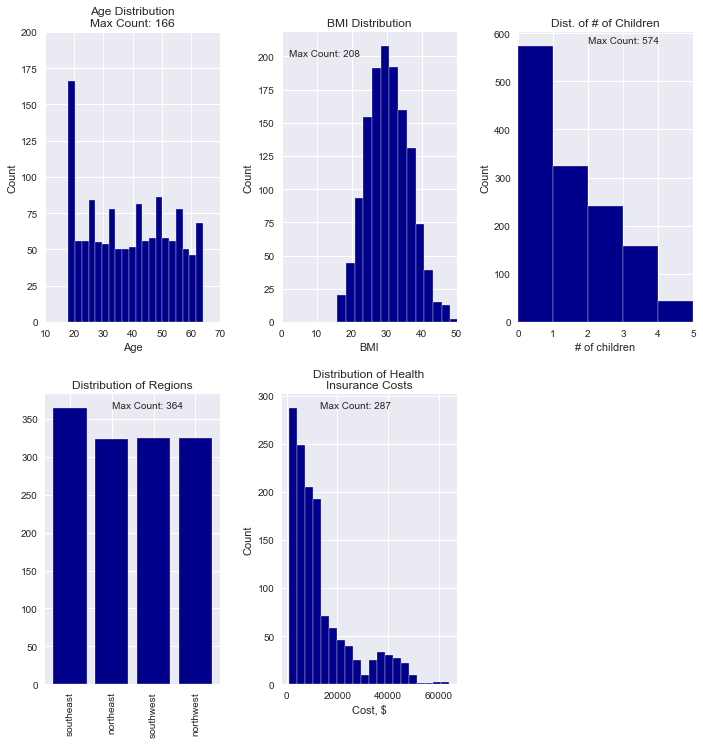

In [9]:
plt.style.use("seaborn")

plt.close("all")

plt.figure(figsize=(12,12))

#####
ax = plt.subplot(2, 3, 1)

num_bins_age = 20
# bin_size_age = ceil(max(ages) - min(ages)) / num_bins
# print(bin_size_age)
# ageMax = max_count(ages, min(ages), max(ages), bin_size_age)

counts, bins, patches = plt.hist(ages, bins=num_bins_age, facecolor='#00008B', edgecolor="white")
plt.axis([10, 70, 0, 200])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title(f"Age Distribution\nMax Count: {int(max(counts))}")
ax.set_xticks([i for i in range(10, 71, 10)])


ax = plt.subplot(2,3,2)
num_bins_bmi = 15
counts, bins, patches = plt.hist(bmi, bins=num_bins_bmi, facecolor='#00008B', edgecolor="white")
plt.xlim(0, 50)
#plt.ylim()
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution")
plt.text(2, 200, f"Max Count: {int(max(counts))}")


ax = plt.subplot(2,3,3)
num_bins_children=5
counts, bins, patches = plt.hist(children, bins=num_bins_children, facecolor='#00008B', edgecolor="white")
plt.xlim(0,5)
plt.xlabel("# of children")
plt.ylabel("Count")
plt.title("Dist. of # of Children")
max_counts = int(max(counts))
plt.text(2, max_counts + 5, f"Max Count: {max_counts}")


# Bar chart now for region
ax = plt.subplot(2,3,4)
locations = set(region)
print(locations)
x = [i for i in range(len(locations))]
y = [region.count(loc) for loc in locations]
plt.bar(x, y, color="#00008B", edgecolor="white")
ax.set_xticks(x)
ax.set_xticklabels(locations, rotation="vertical")
plt.title("Distribution of Regions")
plt.text(1,max(y),f"Max Count: {max(y)}")


ax = plt.subplot(2,3,5)
num_bins_charges = 20
counts, bins, patches = plt.hist(charges, bins=num_bins_charges, facecolor='#00008B', edgecolor="white")
#plt.xlim()
plt.xlabel("Cost, $")
plt.ylabel("Count")
plt.title("Distribution of Health\nInsurance Costs")
max_counts = int(max(counts))
plt.text(mean(charges), max_counts, f"Max Count: {max_counts}")

plt.subplots_adjust(left=0.15, wspace=0.35, hspace=0.25)

plt.savefig("MedicalInsuranceData_EDA.png")

Exploring the dataset before planning out my project.

#### Age
Looking at the data distribution in terms of metrics.

In [10]:
age_series = pd.Series(ages)
age_series.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
dtype: float64

#### Sex
Wanted to have available the counts for each gender in the dataset.

In [11]:
sex = [member["sex"] for ID, member in insurance_data.items()]

# sex_series = pd.Series(sex)
# sex_series.describe()

sex_counts = {}
for gender in set(sex):
    sex_counts[gender] = 0

for p in sex:
    sex_counts[p] += 1

for p in sex_counts.keys():
    print(f"{p} {sex_counts[p]}")

female 662
male 676


#### Children
Looking at the data distribution in terms of metrics.

In [12]:
children_s = pd.Series(children)
children_s.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
dtype: float64

#### BMI
Looking at the distribution in terms of metrics

In [13]:
bmi_s = pd.Series(bmi)
bmi_s.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
dtype: float64

#### (Finally) Charges/Insurance Cost


In [44]:
charges_s = pd.Series(charges, name="charges")
charges_s.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

___
### (II.) Scoping the project


Now that you have looked over your dataset, plan out what you want to analyze. What is it that you want to find out about this dataset? Based on the way information is organized, certain inspections may be easier to perform than others. As you map out the process, consider the scope of your analysis as well.

Properly scoping your project will greatly benefit you; scoping creates structure while requiring you to think through your entire project before you begin. You should start by stating the goals for your project, then gathering the data, and considering the analytical steps required. A proper project scope can be a great road map for your project, but keep in mind that some down-stream tasks may become dead ends which will require adjustment to the scope.

#### Description

I'm going to look at how features correlate with charges/cost. I'll mostly do this through linear regression, including plots and fitting a line to the data.

I am also interested in better understanding what information can be gleaned from PCA. I know PCA is meant to reduce dimensionality use principal components to explain as much of the variation as possible, and I am hoping to understand how to calculate and display this information.

#### Goals
* Investigate correlation between (1) charges/cost & (2) features -> age, bmi, children

*I'm missing something about PCA ... like if I want to look at variation, I don't think I need to separate out charges/cost from the rest. Basically, I need to reconsider how I am going to perform PCA on the data.

* Perform PCA on numerical features of the dataset -> age, bmi, children, and charges/cost
* Investigate how many features can be used to explain the variation in charges/cost


##### Another idea...

* Can I develop some conditional distributions for the data?
    * I always did struggle with conditional distributions, so maybe I can work on it a bit here
    * Inspiration was from "Scoping Your Project" -> "Hints" on Codecademy: "Figure out what the average age is for someone who has at least one child in this dataset?"

* **IDEA**: Given that someone pays insurance rates in certain ranges (see graph to decide), what is the probability of them being \_\_\_\_\_\_? (<- male/female, living in a certain region)

___
### (III) Analysis

Starting by looking at linear trends between variables.

First up...

#### Age

**_I got really tired while working on the material below. The work is mostly fine, although maybe a little illogical, but it's messy because I really COULDN'T FIGURE OUT LINEAR REGRESSION._**

**_I could use some more time learning/practicing linear regression with Python_**

Age vs Cost Correlation is 0.299
Age vs Cost Covariance is 197.401
Linear Model: y = 287.35x + 1990.31


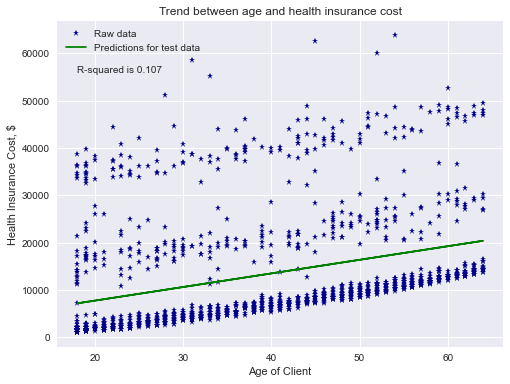

In [15]:
# Looking at correlation coefficient
age_cost_correlation = pearsonr(ages, charges)[0]
print(f"Age vs Cost Correlation is {age_cost_correlation:.3f}")

age_cost_cov = np.cov(ages, charges, rowvar=True)[0][0]
print(f"Age vs Cost Covariance is {age_cost_cov:.3f}")

# Developing a linear regression for the data

X_train, X_test, y_train, y_test = train_test_split(np.array(ages), np.array(charges), train_size=0.7,\
                                                    test_size=0.3)

# ages_charges_data = np.array([ages,charges]).T
# print(ages_charges_data.shape)
# ages_arr = np.array([ages])
# print(ages_arr.shape)

# ages_arr2 = np.array([ages]).reshape(-1, 1)
# charges_arr = np.array([charges]).reshape(-1, 1)
# print(charges_arr.shape)


### DIDN'T REALLY KNOW WHAT I WAS DOING HERE ... TRYING SOMETHING SIMPLER!
# made some changes to simplify
line_reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
m = line_reg.coef_[0][0]  # type is numpy.ndarray (2D array)
b = line_reg.intercept_[0] # type is numpy.ndarray (1D array)
# print(m, type(m), b, type(b))
print(f"Linear Model: y = {m:.2f}x + {b:.2f}")
y_hat = m * X_test + b
r2 = line_reg.score(X_train.reshape(-1,1), y_train.reshape(-1,1))
# Probably should be using ... (below) ... but I was trying to improve my understanding of the linear
# regression tool in sklearn
# r2 = line_reg.score(X_test.reshape(-1,1), y_test.reshape(-1, 1)

## NOTE: THE BELOW CODE DOES WORK ... JUST IN A DIFFERENT WAY THAN I ORIGINALLY INTENDED
# print(f"Regression Score of the linear fit is {line_reg.score(X_test.reshape(-1,1), y_test.reshape(-1,1)):.3f}")
#y_hat = line_reg.predict(X_test.reshape(-1,1))
# r2 = r2_score(y_test.reshape(-1,1), y_hat)
# print(f"This is r2_score {r2}")

# plotting the data now...
plt.figure(figsize=(8,6))

ax = plt.subplot(1, 1, 1)
plt.plot(ages, charges, marker="*", linestyle="", color="#00008B", label="Raw data")
plt.plot(X_test, y_hat, linestyle="-", color="#008000", label="Predictions for test data")
plt.xlabel("Age of Client")
plt.ylabel("Health Insurance Cost, $")
plt.title("Trend between age and health insurance cost")
plt.text(18, 56000, f"R-squared is {r2:.3f}")
plt.legend()

This was a somewhat interesting plot to make. Now, I want to try to learn something new by trying to use the other data to color this graph.

My goal will be...
* can I identify a feature that causes the strata that are developing in the plot above?
* Try coloring the data points by (1) number of children, (2) location, (3) bmi values

I will have to learn how to use `plt.scatter()` in a new way. (links below)

For `plt.scatter()`:
* [ColorMap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html#matplotlib.colors.Colormap)
* [PyPlot.Scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

Other Links that I had open:
* [Correlation Coefficients Python](https://realpython.com/numpy-scipy-pandas-correlation-python/)
    
__Continuing my analysis work now by trying to color the graph that I created just before stopping last time.__

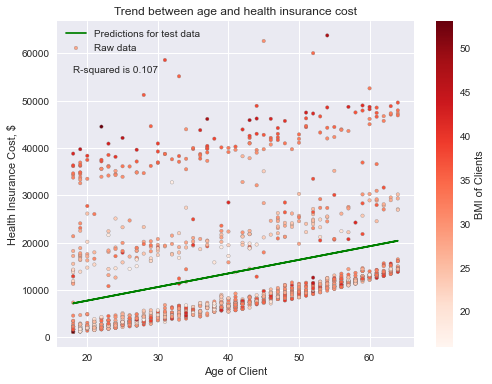

In [16]:
plt.style.use("seaborn")
plt.figure(figsize=(8,6))

ax = plt.subplot(1, 1, 1)

#Creates a continuous norm to map from data points to colors
norm = plt.Normalize(min(bmi), max(bmi)) # didn't have to use this for now

# Colors = BMI values
# X = age
# Y = cost of health inssurance
# colors = [(b-min(bmi))/(max(bmi)-min(bmi)) for b in bmi]

plt.scatter(ages, charges, marker=".", c=bmi, norm=norm, cmap="Reds", alpha=1, label="Raw data", 
            edgecolor="grey")
#plt.scatter(ages, charges, marker="*", c=colors, cmap="Reds", alpha=1, label="Raw data", edgecolor="grey")
# plt.colorbar() is able to refer to the current image
plt.colorbar(label="BMI of Clients")

plt.plot(X_test, y_hat, linestyle="-", color="#008000", label="Predictions for test data")
plt.xlabel("Age of Client")
plt.ylabel("Health Insurance Cost, $")
plt.title("Trend between age and health insurance cost")
plt.text(18, 56000, f"R-squared is {r2:.3f}")
plt.legend()
plt.savefig("AgeCost_BMI_Correlation.png")

__Took a while but I got my plot done finally. I could probably build off of it, but I'll do something more elaborate in a later project.__

Next Up: I still wanted to investigate how I can use PCA.

* Random scikit learn pages:
    * [Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)
    * [2.5 PCA/Decomposing signals in components](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
    * [Decomposition.PCA](https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
    
    
#### Performing PCA on the numerical features of this dataset
* ages
* bmi
* children
* charges

I'm not sure if this is standard technique, but I'm kind of interested in how the data clusters and how certain components can explain the overall variance of the data. For this reason, I am going to use ALL of the data and numerical features to find the principle components.

I will NOT be using the results of PCA to perform reduction of the data, which was the second part of what we did for HW 10 in EK381 which was where I used PCA for the first time.

Found a tutorial for using PCA in Python actually, so some of the material comes from copying that process - ["PCA Using Python"](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

__Lets get the data into a table/matrix first__

In [29]:
client_data = np.array([ages,bmi,children,charges])
# print(client_data[:3,:])
print("Shape of client_data numpy array: ", client_data.shape)

# data_df = pd.DataFrame(data=client_data, columns=[ages,bmi,children,charges])
data_df = pd.DataFrame(np.array([ages,bmi,children,charges]).T, 
                                   columns=["ages","bmi","children","charges"])

# print(data_df.loc[1,:])
# data_df.describe()

Shape of client_data numpy array:  (4, 1338)


__*Next Up:* Scaling the data to a [0,1] scale__

In [34]:
#REMINDER: sklearn.preprocessing is imported as pp

transformed_X = pp.StandardScaler().fit_transform(data_df.values)

# Preview
print(type(transformed_X))
print(transformed_X.shape)
print(transformed_X[:3,:])

<class 'numpy.ndarray'>
(1338, 4)
[[-1.43876426 -0.45332    -0.90861367  0.2985838 ]
 [-1.50996545  0.5096211  -0.07876719 -0.95368917]
 [-0.79795355  0.38330685  1.58092576 -0.72867467]]


__*Next Up:* PCA on the data and plotting 2 principle components__

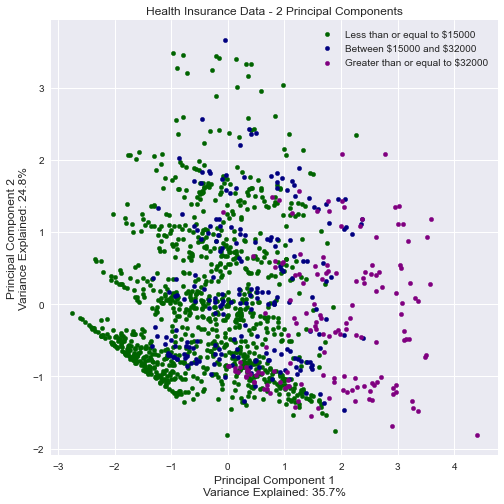

In [72]:
# PCA STEPS IN EXPLANATION
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)

# I'm going to combine the two steps
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(transformed_X)
principal_df = pd.DataFrame(data=principalComponents, columns=["principal component 1",
                                                               "principal component 2"])

variance_explained = pca.explained_variance_ratio_

# REMINDER: charges_s --> a pandas Series created earlier
charges_df = charges_s.to_frame()
charges_2 = []
for charge in charges_s:
    if (charge <= 15000):
        charges_2.append(0)
    elif (charge > 15000 and charge < 32000):
        charges_2.append(1)
    else:
        charges_2.append(2)
charges_np = np.array(charges_2)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(f"Principal Component 1\nVariance Explained: {variance_explained[0]:.1%}", fontsize=12)
ax.set_ylabel(f"Principal Component 2\nVariance Explained: {variance_explained[1]:.1%}", fontsize=12)
ax.set_title("Health Insurance Data - 2 Principal Components")

labels = ["Less than or equal to $15000", "Between \$15000 and \$32000", "Greater than or equal to $32000"]

for color in enumerate(['#006400','#000080','#800080']):
    if (color[0]==0):
        indicesPlot = (charges_np == 0)
    elif (color[0]==1):
        indicesPlot = (charges_np == 1)
    else:
        indicesPlot = (charges_np == 2)
        
    # print(type(indicesPlot),"\n",indicesPlot.describe(),indicesPlot.shape,"\n","\n",indicesPlot.iloc[:4])
    # print(indicesPlot.loc[:4,"charges"])
    
    ax.scatter(principal_df.loc[indicesPlot, "principal component 1"],
               principal_df.loc[indicesPlot, "principal component 2"], c = color[1], s=20)
    
    ax.legend(labels)
    #ax.grid()
    plt.savefig("PCAonHealthInsuranceData.png")